<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Multinomial Logistic Regression Lab

---

## Introduction

In this lab you will practice performing multinomial logistic regression while also applying cross-validation and regularisation on a popular sample dataset about bikesharing. You'll be predicting the season according to the given weather data.

---

## Aim

1. Structure a new dataframe with features, create dummy features with pd.get_dummies(), and join dummies to the data frame
2. Use the bikeshare dataset to create cross-validated multinomial logistic regression models.
3. Build 3 different models: default logistic regression, logistic regression with l1-penalty, and logistic regression with l2-penalty. Report on the accuracy reached in each case.

--- 
## Additional Resources

- [The bikeshare dataset](https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset#)
- [Cross-validation with sklearn](http://scikit-learn.org/stable/modules/cross_validation.html)
- [Logistic regression with sklearn](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
 
---

## 1. Load the libraries and the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
 
plt.style.use('ggplot')
sns.set(font_scale=1.5)
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import cross_val_score

In [3]:
path = '../../../../resource-datasets/bikeshare/bikeshare.csv'
bikeshare = pd.read_csv(path)

In [4]:
bikeshare.shape

(17379, 17)

In [5]:
bikeshare.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

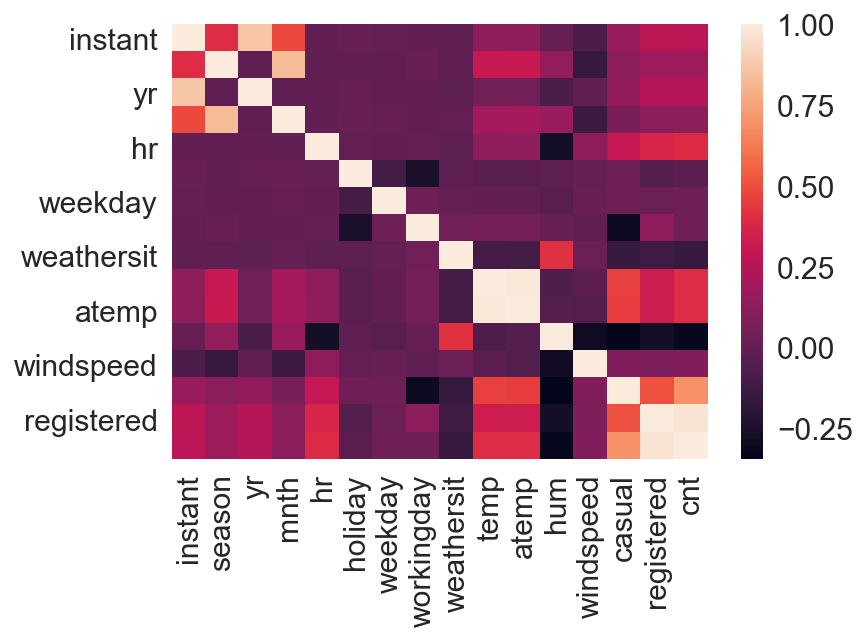

In [6]:
sns.heatmap(bikeshare.corr())
plt.show()

In [7]:
bikeshare.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [8]:
bikeshare.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [9]:
bikeshare.season.value_counts()

3    4496
2    4409
1    4242
4    4232
Name: season, dtype: int64

In [10]:
seasons = bikeshare.season.unique()

In [11]:
bikeshare.weathersit.unique()

array([1, 2, 3, 4])

In [12]:
weather = pd.get_dummies(bikeshare.weathersit, prefix='weather',drop_first=True)
weather.head()

,weather_2,weather_3,weather_4
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


### 2. Join the bikeshare dataframe and the weather dataframe

In [15]:
df = bikeshare.join(weather);

In [17]:
df.shape

(17379, 20)

### 3. Choose the weatherrelated features as predictors and the season as response

In [21]:
X = df[['weather_2','weather_3','weather_4']]
y = df['season']

### 4. Perform a train-test split

In [33]:
from sklearn.model_selection import train_test_split, cross_val_predict

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

### 5. Rescale the data set.

Use the standard scaler with `fit_transform` on the training set and with transform on the `test set`. Why would you consider doing it in this way?

In [35]:
from sklearn.preprocessing import StandardScaler

In [36]:
ss = StandardScaler()
Xstd_train = ss.fit_transform(X_train)
Xstd_test = ss.transform(X_test)

### 6. Fit a logistic regression model on the training set. Evaluate it and get the predictions on the test set.

In [37]:
lr = LogisticRegression()
lr.fit(Xstd_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

### 7. Report the accuracy, the confusion matrix and the classification report on the test set

In [38]:
scores = cross_val_score(lr, X, y)
print("Cross-validated scores:", scores)
print("Mean CV R2:", np.mean(scores))
print('Std CV R2:', np.std(scores))

Cross-validated scores: [0.28753883 0.2433552  0.27646348]
Mean CV R2: 0.26911916870517955
Std CV R2: 0.018770590993151478


In [39]:
predictions = cross_val_predict(lr, X, y, cv=5)
confusion = confusion_matrix(y, predictions)
pd.DataFrame(confusion,
             columns=sorted(y_train.unique()),
             index=sorted(y_train.unique()))

,1,2,3,4
1,79,450,2665,1048
2,127,349,2859,1074
3,25,393,3280,798
4,104,563,2609,956


### 8. Use LogisticRegressionCV to fit a range of l1 penalty values to the training set. 

Hint: l1-penalty requires setting the solver to liblinear.

In [48]:
lrCvl1 = LogisticRegression(solver="liblinear", penalty='l1')
lrCvl1.fit(Xstd_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

### 9. Use LogisticRegressionCV to fit a range of l2 penalty values to the training set. 

In [86]:
lrCvl2 = LogisticRegression(solver="newton-cg", penalty='l2')
lrCvl2.fit(Xstd_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='newton-cg', tol=0.0001,
          verbose=0, warm_start=False)

### 10. Obtain the confusion matrices for the predictions on the test set obtained with the l1 and l2 regularized models. Compare and explain your findings.

In [87]:
predictions_l1 = cross_val_predict(lrCvl1, X, y, cv=5)
confusion = confusion_matrix(y, predictions)
pd.DataFrame(confusion,
             columns=sorted(y_train.unique()),
             index=sorted(y_train.unique()))

,1,2,3,4
1,79,450,2665,1048
2,127,349,2859,1074
3,25,393,3280,798
4,104,563,2609,956


In [88]:
predictions_l2 = cross_val_predict(lrCvl2, X, y, cv=5)
confusion = confusion_matrix(y, predictions)
pd.DataFrame(confusion,
             columns=sorted(y_train.unique()),
             index=sorted(y_train.unique()))

,1,2,3,4
1,79,450,2665,1048
2,127,349,2859,1074
3,25,393,3280,798
4,104,563,2609,956


In [89]:
#The same confusion matrices for l1 and l2 

### 11. Plot the accuracy obtained on the training set versus the penalty strength for both, l1 and l2.

In [90]:
from sklearn import metrics

In [103]:
accuracy_l1 =[]
accuracy_l2 =[]
for i in np.logspace(-5, 5, 15):
    lrCvl2 = LogisticRegression(solver="newton-cg", penalty='l2', C=i)
    lrCvl1 = LogisticRegression(solver="liblinear", penalty='l1', C=i)
    accuracy_l1.append(cross_val_score(lrCvl1, X, y))
    accuracy_l2.append(cross_val_score(lrCvl2, X, y))
    



/Users/jasmine/anaconda3/lib/python3.6/site-packages/scipy/optimize/linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/jasmine/anaconda3/lib/python3.6/site-packages/sklearn/utils/optimize.py:195: UserWarning: Line Search failed
  warnings.warn('Line Search failed')


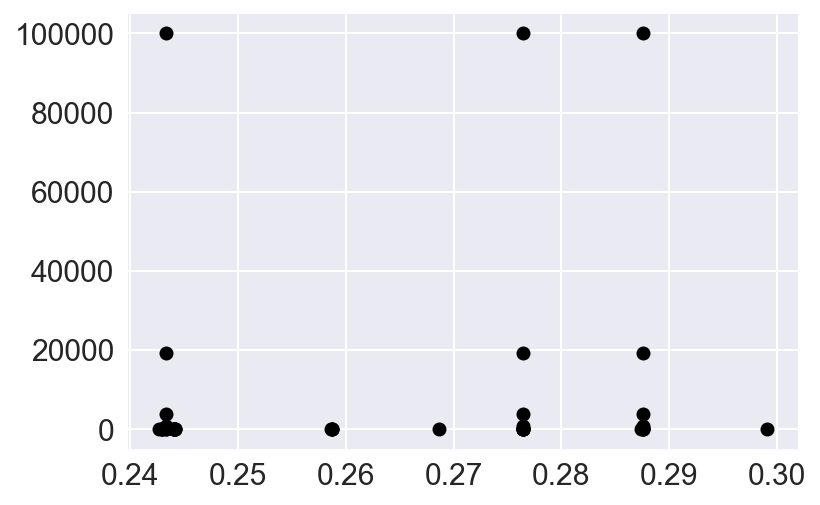

In [115]:
#plt(accuracy_l1,accuracy_l2);
plt.plot(accuracy_l1,np.logspace(-5, 5, 15), 'o', color='black');


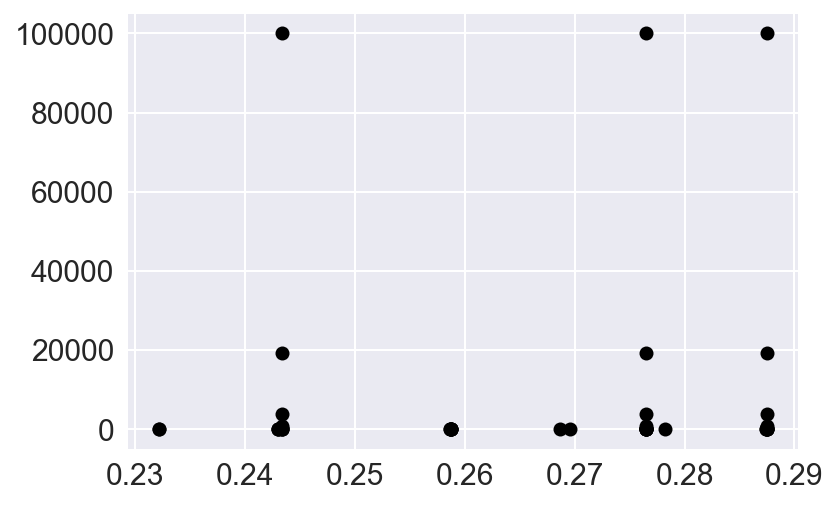

In [116]:
plt.plot(accuracy_l2,np.logspace(-5, 5, 15), 'o', color='black');

### 12. Bonus: Create a ROC curve and a precision-recall curve for the best l1 and l2 models

In [93]:
from sklearn.preprocessing import label_binarize


In [94]:
def plot_precision_recall(model, y_bin, X, f1_lines=True):
    '''
    Takes a fitted model, 
    an array of binarised true y-values, 
    a predictor matrix and
    and additional argument if lines of constant f1-score levels should be plotted.
    Returns a precision-recall plot for each of the classes.
    '''

    # create dictionaries for storing precision/recall values
    precision = {}
    recall = {}

    # loop over all the classes
    # calculate precision-recall values for the current class versus the rest
    for i, cl in enumerate(model.classes_):
        precision[cl], recall[cl], threshold = metrics.precision_recall_curve(
            y_bin[:, i], model.predict_proba(X)[:, i])

    # average_precision_score calculates the area under the curve for each class
    average_precision_scores = [round(metrics.average_precision_score(
        y_bin[:, i], model.predict_proba(X)[:, i]), 2) for i in range(len(model.classes_))]

    # plot the precision-recall curves for each class versus the rest
    fig, ax = plt.subplots(figsize=(6,4))
    for i, key in enumerate(precision.keys()):
        ax.plot(precision[key], recall[key], lw=2,
                 label='class {}, average precision score {}'.format(key, average_precision_scores[i]))

    ax.set_ylim([0, 1.05])
    ax.legend(loc=[1,0])
    ax.set_title('Precision-Recall Curve', fontsize=20)
    ax.set_xlabel('Recall', fontsize=18)
    ax.set_ylabel('Precision', fontsize=18)

    # add lines of constant F1 scores
    if f1_lines == True:
        for const in np.linspace(0.2,0.9,8):
            x_vals = np.linspace(0.001, 0.999, 100)
            y_vals = 1./(2./const-1./x_vals)
            ax.plot(x_vals[y_vals > 0], y_vals[y_vals > 0],
                     color='lightblue', ls='--', alpha=0.9)
            ax.set_ylim([0, 1])
            ax.annotate('f1={0:0.1f}'.format(const),
                         xy=(x_vals[-10], y_vals[-2]+0.0))

    return fig, ax

In [95]:
from sklearn.preprocessing import label_binarize
y_bin = label_binarize(y, lrCvl1.classes_)



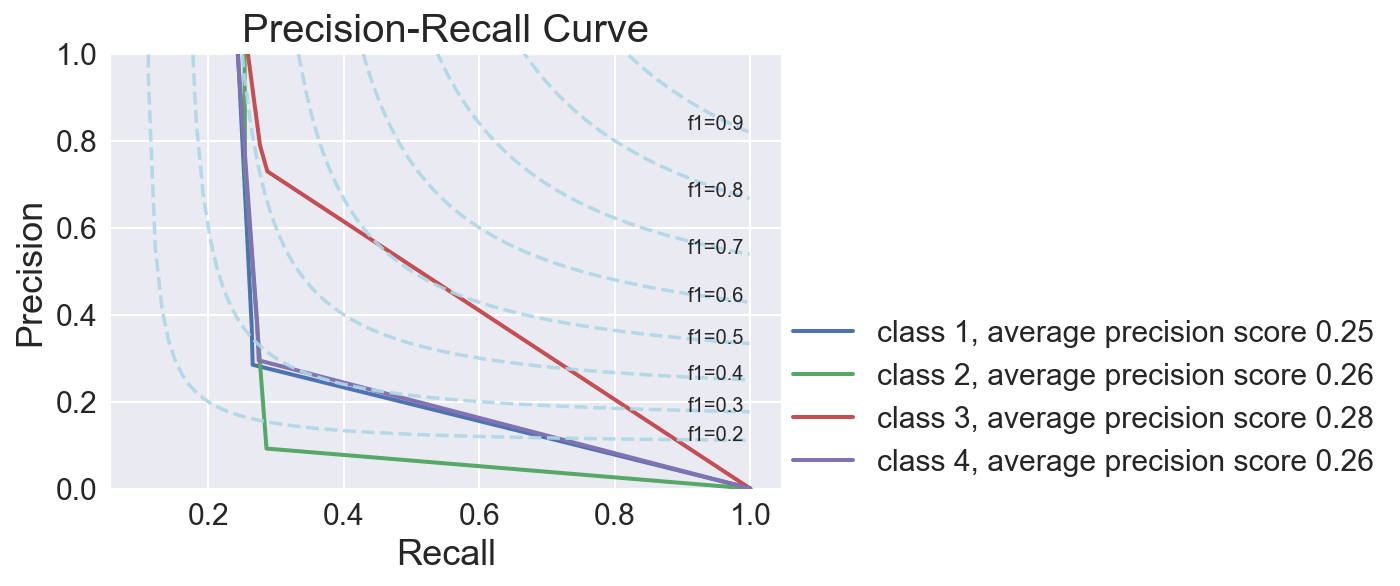

In [96]:
fig, ax = plot_precision_recall(lrCvl1, y_bin, X)

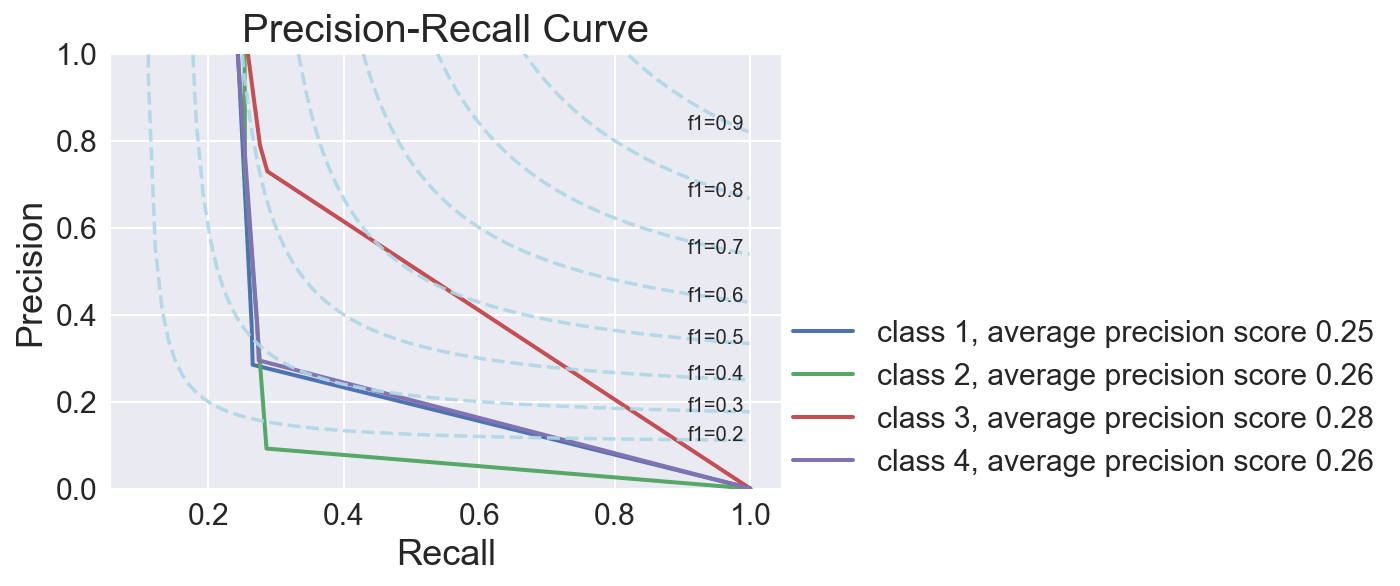

In [97]:
fig, ax = plot_precision_recall(lrCvl2, y_bin, X)

In [98]:
def plot_roc(model, y_bin, X):
    '''
    Takes a fitted model,
    binarised true y-values and
    a predictor matrix.
    Returns a ROC curve for each of the classes.
    '''

    # create dictionaries for storing FPR/TPR values
    fpr = {}
    tpr = {}
    
    # loop over all the classes
    # calculate TPR-FPR values for the current class versus the rest
    for i, cl in enumerate(model.classes_):
        fpr[cl], tpr[cl], threshold = metrics.roc_curve(
            y_bin[:, i], model.predict_proba(X)[:, i])
        
    # roc_auc_score calculates the area under the curve for each class
    auc_scores = [round(metrics.roc_auc_score(y_bin[:, i], model.predict_proba(X)[
                        :, i]), 2) for i in range(len(model.classes_))]
    
    # plot the ROC curve
    fig, ax = plt.subplots()
    for i, key in enumerate(fpr.keys()):
        ax.plot(fpr[key], tpr[key], lw=2,
                 label='class {}, ROC_AUC {}'.format(key, auc_scores[i]))
    ax.plot([0, 1], [0, 1], ls='--', lw=2)
    ax.set_ylim([0, 1.05])
    ax.legend(loc=[1,0])
    ax.set_title('ROC Curve', fontsize=20)
    ax.set_xlabel('FPR', fontsize=18)
    ax.set_ylabel('TPR', fontsize=18)
    
    return fig, ax

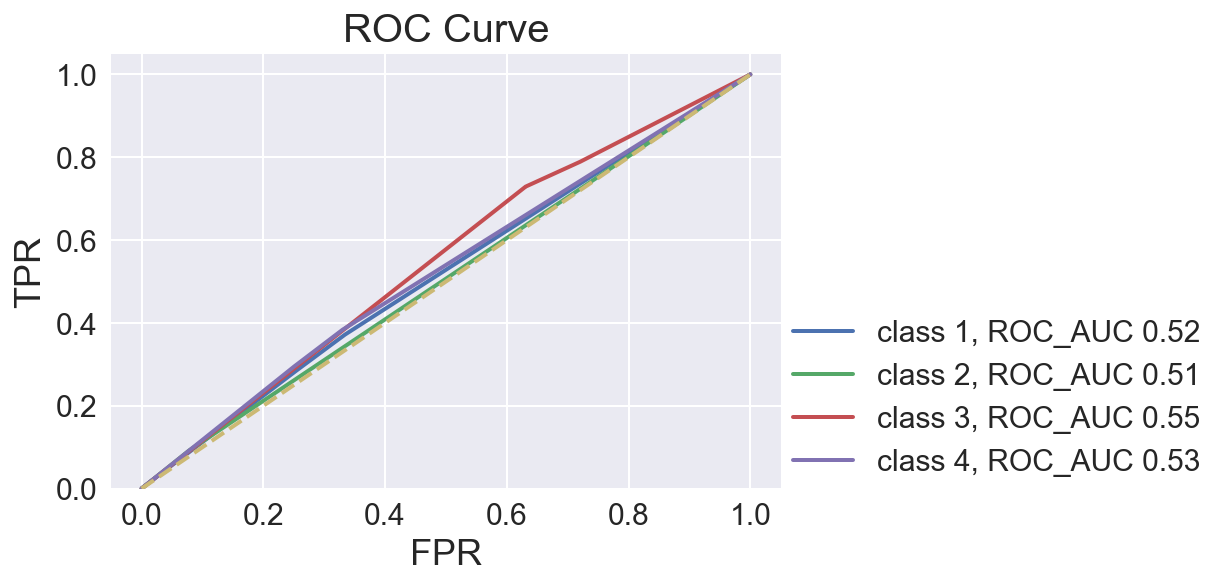

In [99]:
fig, ax = plot_roc(lrCvl1, y_bin, X)

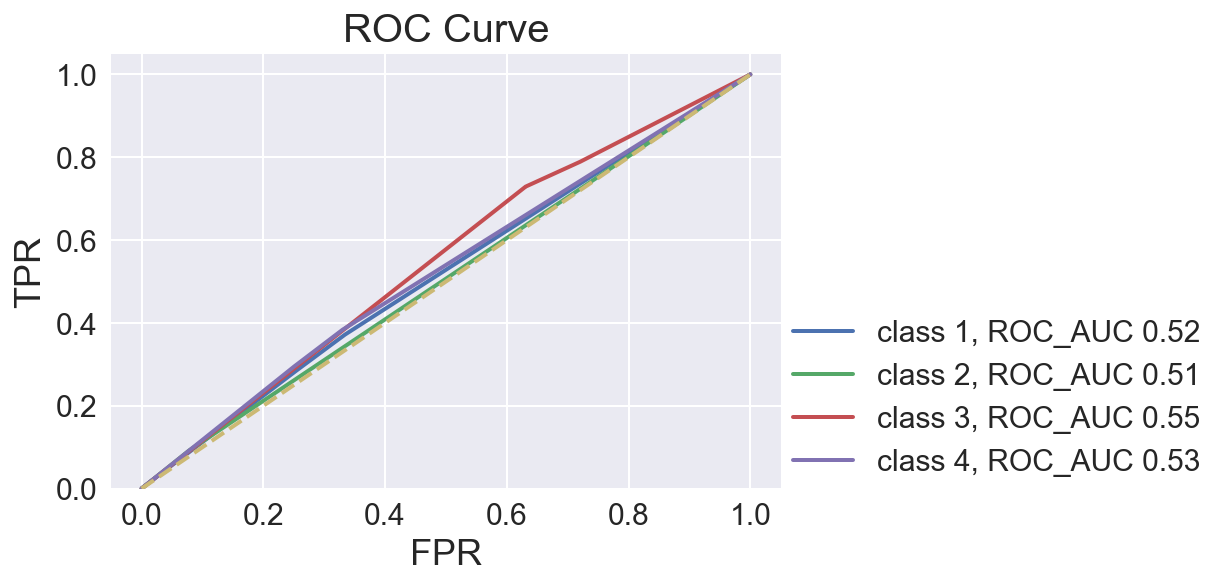

In [85]:
fig, ax = plot_roc(lrCvl2, y_bin, X)